In [1]:
import face_recognition  # Used for getting face encodings
import cv2  # Used to load and analyze video input
import numpy as np
import pandas as pd
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.fft import fft, ifft, fftfreq  # Used for Fourier Transformation
from tqdm.notebook import tqdm, trange  # Used for loading progress bar
import time    # Used for loading progress bar

In [2]:
# take the avg of the max occurence bin from histogram
def avg_maxbin(df):
    avg_maxbin_hist = []
    for i in df.index:
        # Bin size defined with sturge's rule
        # K = 1 + 3.322log(N) = 1 + 3.322*log(128) = 8
        # K = number of class intervals (vins)
        # N = number of observations in the set
        counts, bins, bars = plt.hist(df.iloc[i], bins=8)
        selected_ind = np.argmax(counts)   # TODO if np.argmax returns two indexs
        avg_maxbin_hist.append(round((bins[selected_ind] + bins[selected_ind+1]) / 2, 4))
    return avg_maxbin_hist


def input_video_to_face_encoding_df(input_video_path):
    df = None
    
    input_video = cv2.VideoCapture(input_video_path)
    total_frames = int(input_video.get(cv2.CAP_PROP_FRAME_COUNT))

    # TODO: Ensure total_frames larger than threshold
    
    for i in tqdm(range(total_frames)):
        success, frame = input_video.read()
        time.sleep(0.01)
        # Resize frame of video to 1/4 size for faster face recognition processing
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_small_frame = small_frame[:, :, ::-1]
        # Get Face Locations
        face_locations = face_recognition.face_locations(rgb_small_frame)
        # Get Face Encodings
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        # If face exist in frame, update df
        if len(face_encodings) != 0:
            face_encoding_updated = np.expand_dims(face_encodings[0], axis=1)
            df_face = pd.DataFrame(face_encoding_updated, columns=[i+1])
            df = pd.concat([df, df_face], axis=1)

    df_avg_maxbin = avg_maxbin(df)
    df['mean'] = df.mean(axis=1)
    df['avg_maxbin'] = df_avg_maxbin
    return df

  0%|          | 0/214 [00:00<?, ?it/s]

  0%|          | 0/241 [00:00<?, ?it/s]

  0%|          | 0/368 [00:00<?, ?it/s]

  0%|          | 0/305 [00:00<?, ?it/s]

  0%|          | 0/278 [00:00<?, ?it/s]

  0%|          | 0/328 [00:00<?, ?it/s]

  0%|          | 0/323 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/228 [00:00<?, ?it/s]

  0%|          | 0/244 [00:00<?, ?it/s]

  0%|          | 0/254 [00:00<?, ?it/s]

  0%|          | 0/254 [00:00<?, ?it/s]

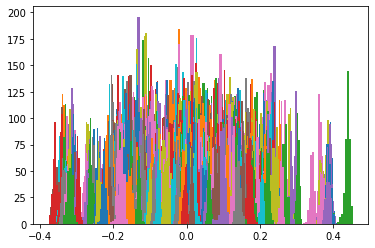

In [3]:
# df_video_mulin1 = input_video_to_face_encoding_df("input_video_mulin1.mp4")
# df_video_mulin2 = input_video_to_face_encoding_df("input_video_mulin2.mp4")
# df_video_mulin3 = input_video_to_face_encoding_df("input_video_mulin3.mp4")
# df_video_mulin4 = input_video_to_face_encoding_df("input_video_mulin4.mp4")
# df_video_mulin5 = input_video_to_face_encoding_df("input_video_mulin5.mp4")
# df_video_mulin6 = input_video_to_face_encoding_df("input_video_mulin6.mp4")
# df_video_mulin7 = input_video_to_face_encoding_df("input_video_mulin7.mp4")

# df_video_jiayue1 = input_video_to_face_encoding_df("input_video_jiayue1.mp4")
# df_video_jiayue2 = input_video_to_face_encoding_df("input_video_jiayue2.mp4")
# df_video_jiayue3 = input_video_to_face_encoding_df("input_video_jiayue3.mp4")
# df_video_jiayue4 = input_video_to_face_encoding_df("input_video_jiayue4.mp4")
# df_video_jiayue5 = input_video_to_face_encoding_df("input_video_jiayue5.mp4")


In [182]:
# pickle.dump(df_video_mulin1, open("df_video_mulin1.p", "wb"))
# pickle.dump(df_video_mulin2, open("df_video_mulin2.p", "wb"))
# pickle.dump(df_video_mulin3, open("df_video_mulin3.p", "wb"))
# pickle.dump(df_video_mulin4, open("df_video_mulin4.p", "wb"))
# pickle.dump(df_video_mulin5, open("df_video_mulin5.p", "wb"))
# pickle.dump(df_video_mulin6, open("df_video_mulin6.p", "wb"))
# pickle.dump(df_video_mulin7, open("df_video_mulin7.p", "wb"))

# pickle.dump(df_video_jiayue1, open("df_video_jiayue1.p", "wb"))
# pickle.dump(df_video_jiayue2, open("df_video_jiayue2.p", "wb"))
# pickle.dump(df_video_jiayue3, open("df_video_jiayue3.p", "wb"))
# pickle.dump(df_video_jiayue4, open("df_video_jiayue4.p", "wb"))
# pickle.dump(df_video_jiayue5, open("df_video_jiayue5.p", "wb"))


In [89]:
# load df from pickle
df_webcam_mulin1 = pickle.load(open( "df_webcam_mulin1.p", "rb"))
df_webcam_mulin2 = pickle.load(open( "df_webcam_mulin2.p", "rb"))
df_webcam_mulin3 = pickle.load(open( "df_webcam_mulin3.p", "rb"))
df_webcam_other1 = pickle.load(open( "df_webcam_other1.p", "rb"))

df_video_mulin1 = pickle.load(open( "df_video_mulin1.p", "rb"))
df_video_mulin2 = pickle.load(open( "df_video_mulin2.p", "rb"))
df_video_mulin3 = pickle.load(open( "df_video_mulin3.p", "rb"))
df_video_mulin4 = pickle.load(open( "df_video_mulin4.p", "rb"))
df_video_mulin5 = pickle.load(open( "df_video_mulin5.p", "rb"))
df_video_mulin6 = pickle.load(open( "df_video_mulin6.p", "rb"))
df_video_mulin7 = pickle.load(open( "df_video_mulin7.p", "rb"))

df_video_jiayue1 = pickle.load(open( "df_video_jiayue1.p", "rb"))
df_video_jiayue2 = pickle.load(open( "df_video_jiayue2.p", "rb"))
df_video_jiayue3 = pickle.load(open( "df_video_jiayue3.p", "rb"))
df_video_jiayue4 = pickle.load(open( "df_video_jiayue4.p", "rb"))
df_video_jiayue5 = pickle.load(open( "df_video_jiayue5.p", "rb"))


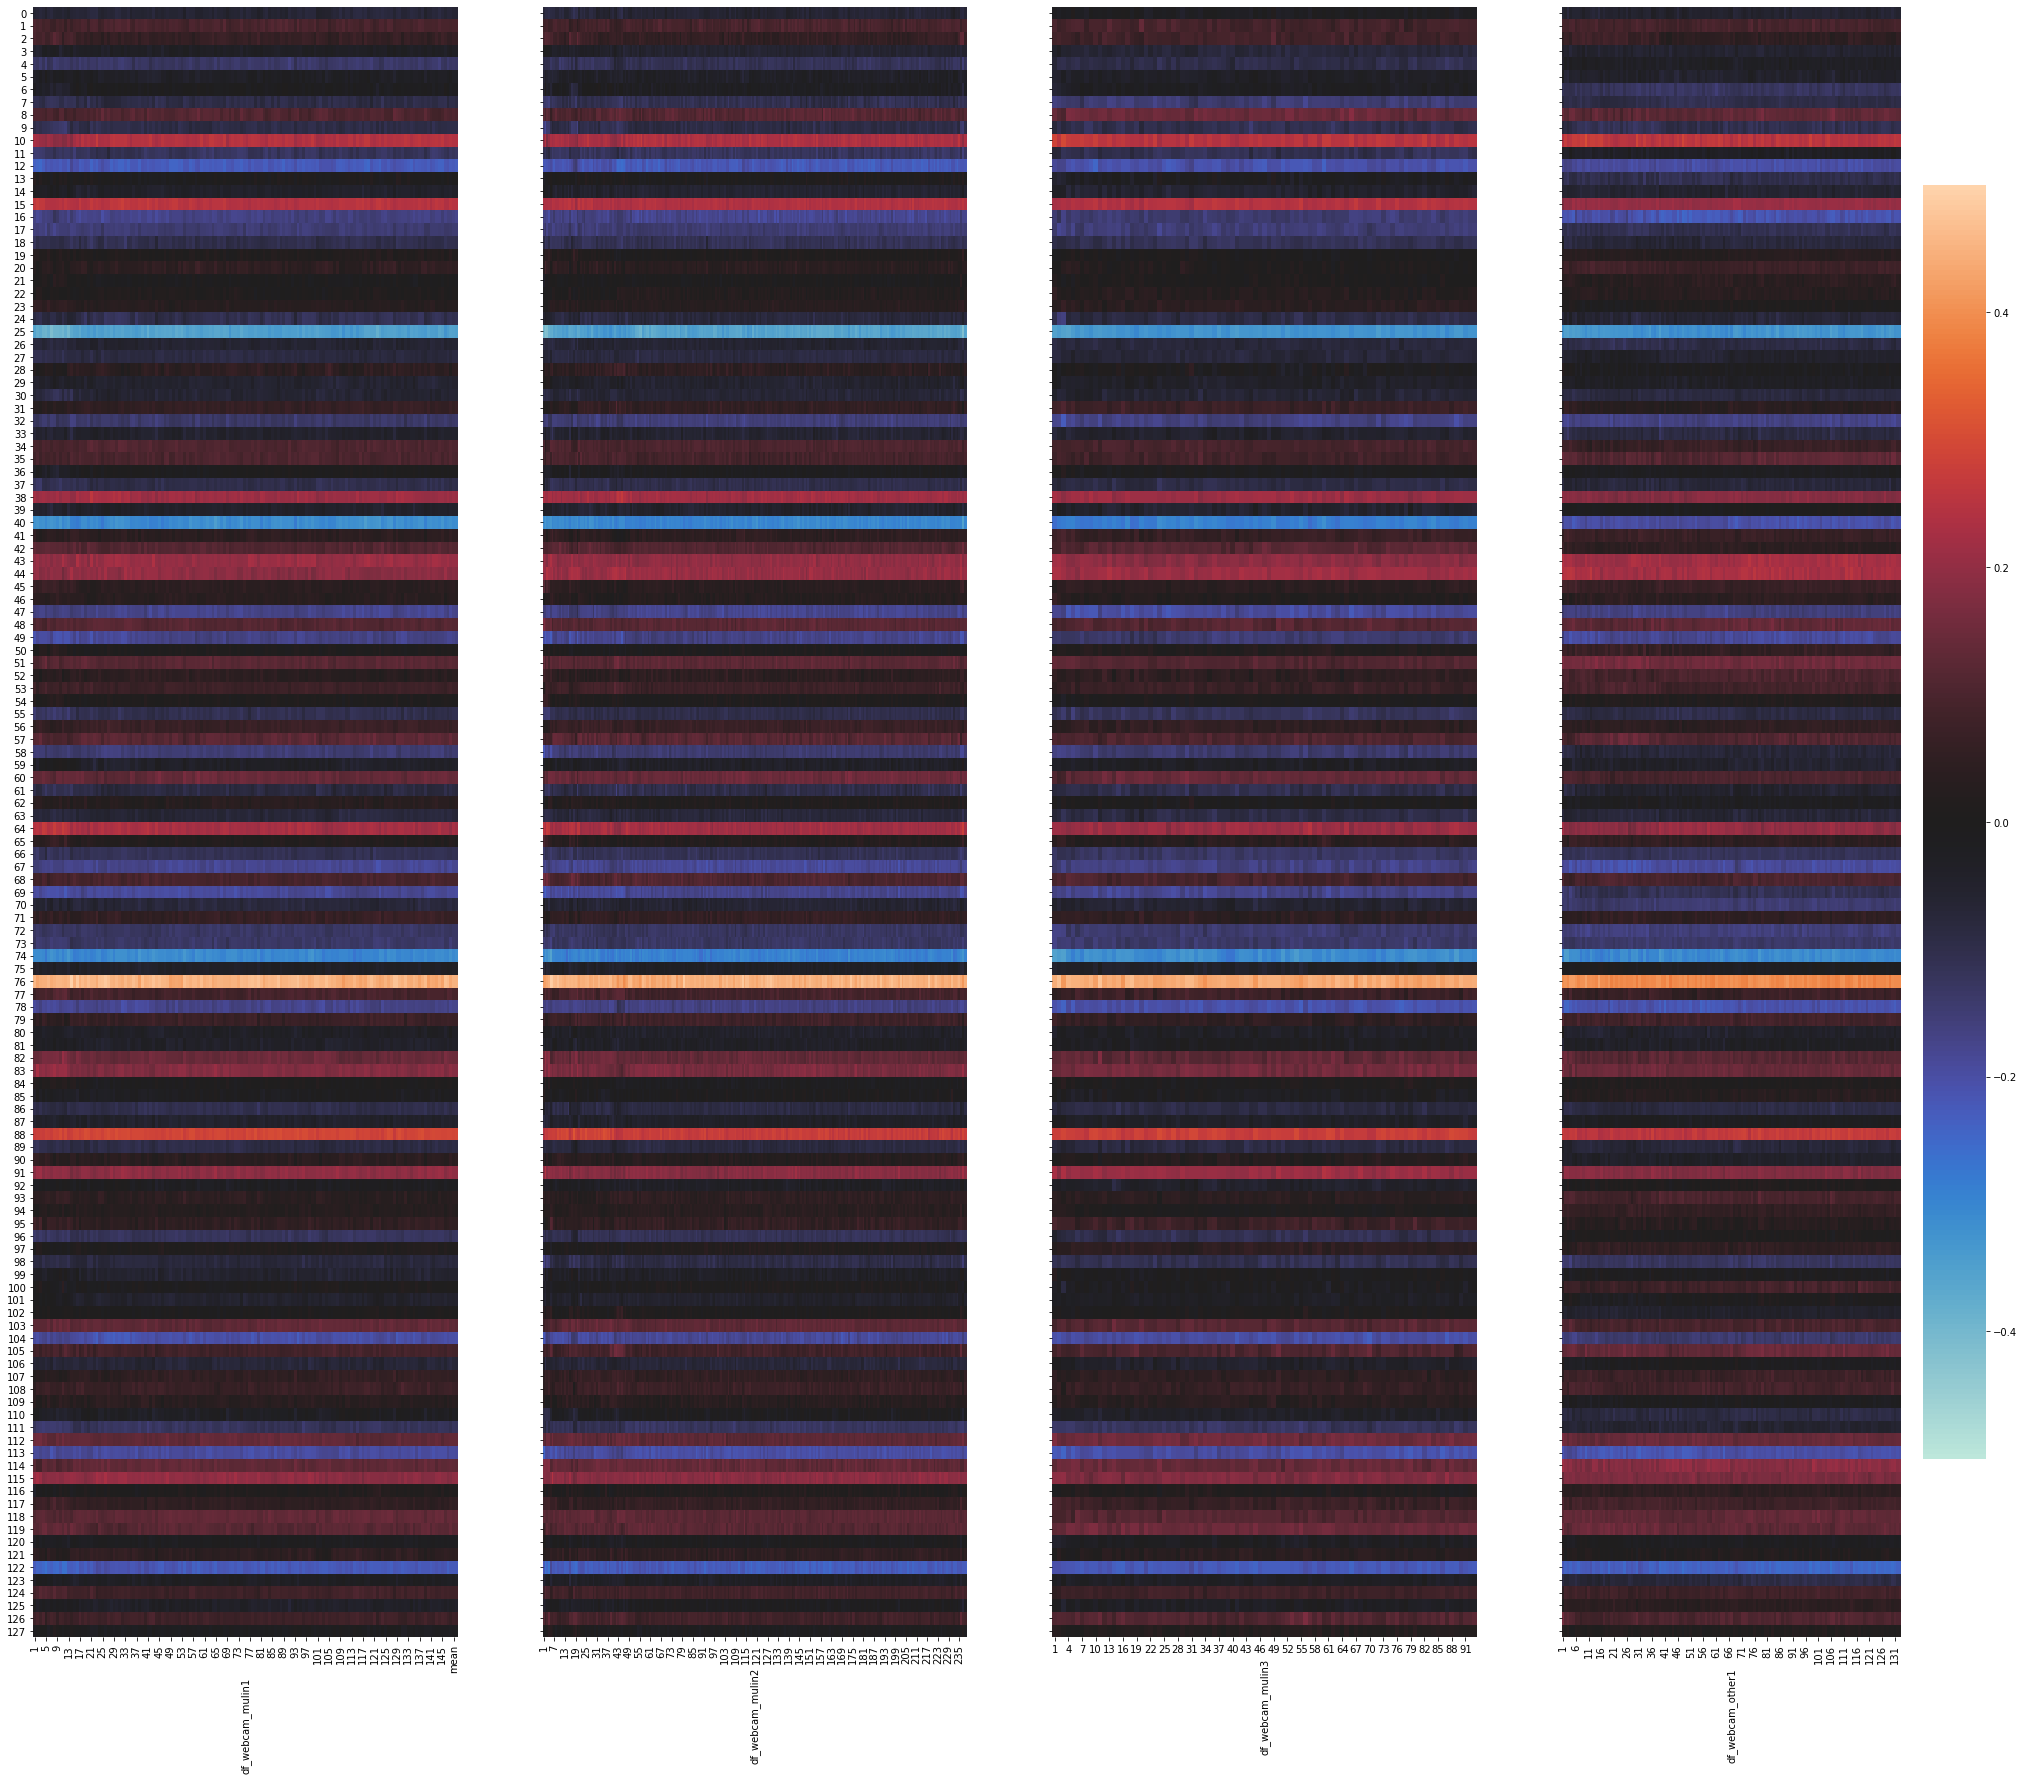

In [25]:
# View Face Encoding Dataframes (from webcam recording) in Heatmaps
f1, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,sharey=True)
f1.set_size_inches(35, 30)

g1 = sns.heatmap(df_webcam_mulin1,vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('df_webcam_mulin1', rotation=90)
g2 = sns.heatmap(df_webcam_mulin2,vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('df_webcam_mulin2', rotation=90)
g3 = sns.heatmap(df_webcam_mulin3,vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax3)
g3.set_ylabel('')
g3.set_xlabel('df_webcam_mulin3', rotation=90)
g4 = sns.heatmap(df_webcam_other1,vmin=-0.5, vmax=0.5, center=0,ax=ax4)
g4.set_ylabel('')
g4.set_xlabel('df_webcam_other1', rotation=90)


# Save heatmap as .PNG file
f1.savefig('face-encodings-webcam-heatmap.png', dpi=100, facecolor='white')

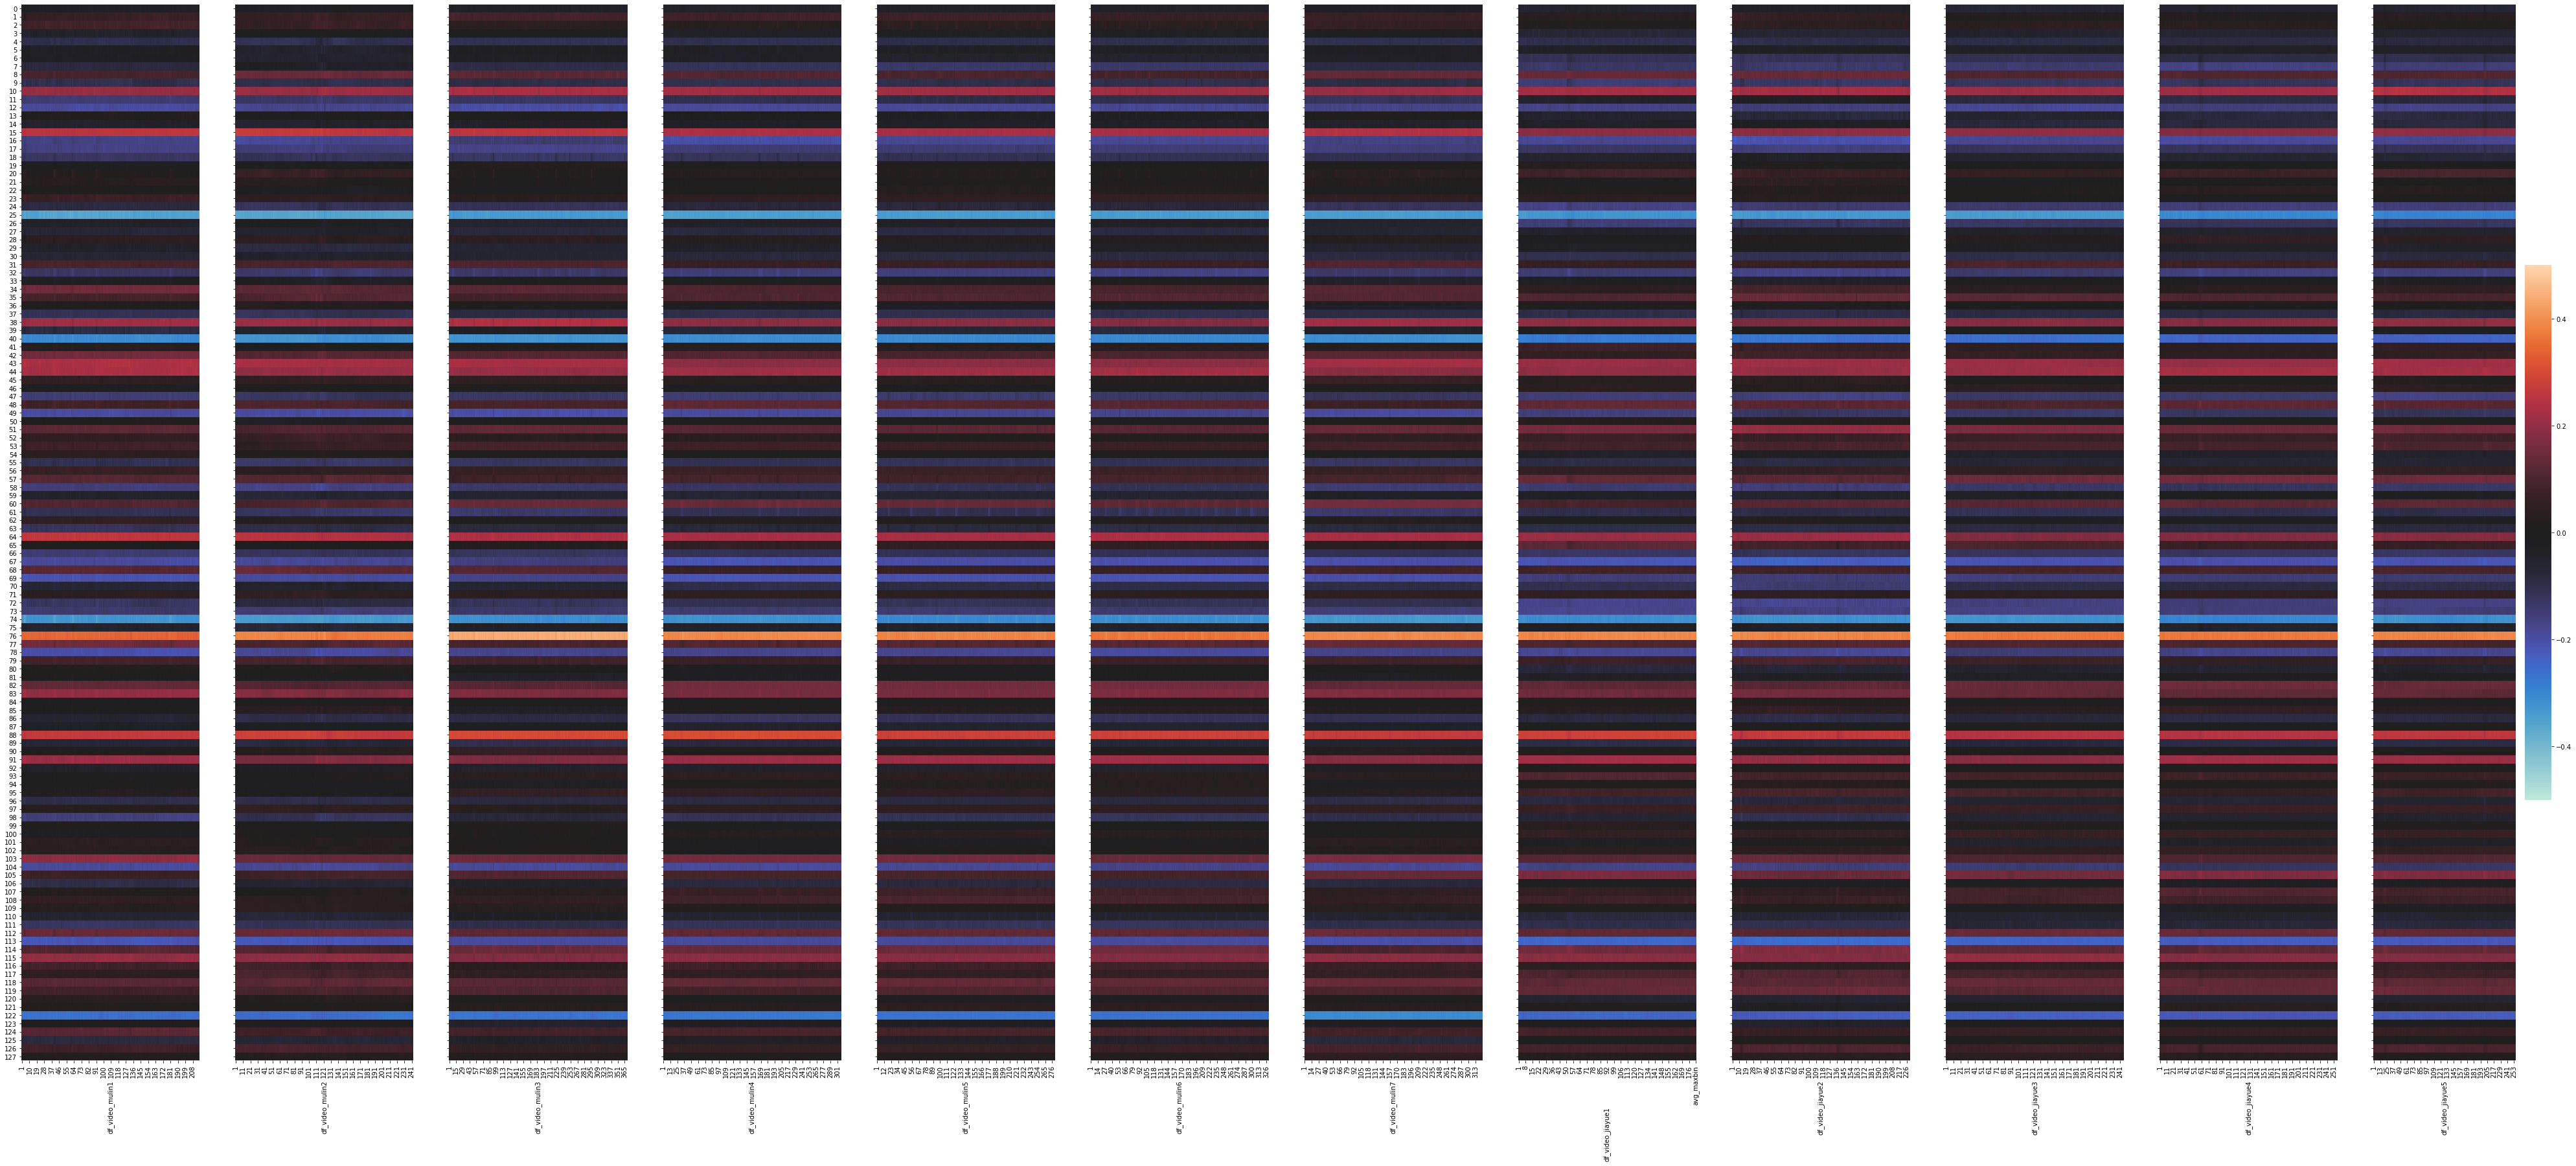

In [183]:
# View Face Encoding Dataframes (from videos) in Heatmaps
f2, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, j_ax1, j_ax2, j_ax3, j_ax4, j_ax5) = plt.subplots(1, 12,sharey=True)
f2.set_size_inches(70, 30)

g1 = sns.heatmap(df_video_mulin1, vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('df_video_mulin1', rotation=90)
g2 = sns.heatmap(df_video_mulin2, vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('df_video_mulin2', rotation=90)
g3 = sns.heatmap(df_video_mulin3, vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax3)
g3.set_ylabel('')
g3.set_xlabel('df_video_mulin3', rotation=90)

g4 = sns.heatmap(df_video_mulin4, vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax4)
g4.set_ylabel('')
g4.set_xlabel('df_video_mulin4', rotation=90)
g5 = sns.heatmap(df_video_mulin5, vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax5)
g5.set_ylabel('')
g5.set_xlabel('df_video_mulin5', rotation=90)
g6 = sns.heatmap(df_video_mulin6, vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax6)
g6.set_ylabel('')
g6.set_xlabel('df_video_mulin6', rotation=90)
g7 = sns.heatmap(df_video_mulin7, vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=ax7)
g7.set_ylabel('')
g7.set_xlabel('df_video_mulin7', rotation=90)

h1 = sns.heatmap(df_video_jiayue1, vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=j_ax1)
h1.set_ylabel('')
h1.set_xlabel('df_video_jiayue1', rotation=90)
h2 = sns.heatmap(df_video_jiayue2,vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=j_ax2)
h2.set_ylabel('')
h2.set_xlabel('df_video_jiayue2', rotation=90)

h3 = sns.heatmap(df_video_jiayue3,vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=j_ax3)
h3.set_ylabel('')
h3.set_xlabel('df_video_jiayue3', rotation=90)
h4 = sns.heatmap(df_video_jiayue4, vmin=-0.5, vmax=0.5, center=0,cbar=False,ax=j_ax4)
h4.set_ylabel('')
h4.set_xlabel('df_video_jiayue4', rotation=90)
h5 = sns.heatmap(df_video_jiayue5, vmin=-0.5, vmax=0.5, center=0,ax=j_ax5)
h5.set_ylabel('')
h5.set_xlabel('df_video_jiayue5', rotation=90)

# Save heatmap as .PNG file
f2.savefig('face-encodings-videos-heatmap.png', dpi=100, facecolor='white')

In [236]:
# Fourier Transform
def fourier_transform(df, option):
    T = 1/60 # sample spacing
    N = 60 # Number of sample points
    if option == 'mean':
        yf = fft(df['mean'].values)
    elif option == 'avg_maxbin':
        yf = fft(df['avg_maxbin'].values)
    else:
        pass
        # TODO: raise error here
    xf = fftfreq(N, T)[:N//2]
    y_values = 2.0/N * np.abs(yf[0:N//2])
    
    return xf, y_values

def top_fft(x_list, y_list, num):
    res = []
    for i in y_list.argsort()[(-1*num):][::-1]:
        res.append(x_list[i])
        
    return res

def bottom_fft(x_list, y_list, num):
    res = []
    for i in y_list.argsort()[:num]:
        res.append(x_list[i])
        
    return res

def analysis_fft(df, N, M, option):
    xf, y_values = fourier_transform(df, option)
    top_N_fft = top_fft(xf, y_values, N)
    bottom_M_fft = bottom_fft(xf, y_values, M)
    
    return top_N_fft, bottom_M_fft, (xf, y_values)

In [237]:
N = 3
M = 1
option = 'mean'
topN_w_mulin1, bottomM_w_mulin1, (xf_w_mulin1, y_w_mulin1) = analysis_fft(df_webcam_mulin1, N, M, option)
topN_w_mulin2, bottomM_w_mulin2, (xf_w_mulin2, y_w_mulin2) = analysis_fft(df_webcam_mulin2, N, M, option)
topN_w_mulin3, bottomM_w_mulin3, (xf_w_mulin3, y_w_mulin3) = analysis_fft(df_webcam_mulin3, N, M, option)
topN_w_other1, bottomM_w_other1, (xf_w_other1, y_w_other1) = analysis_fft(df_webcam_other1, N, M, option)


topN_v_mulin1, bottomM_v_mulin1, (xf_v_mulin1, y_v_mulin1) = analysis_fft(df_video_mulin1, N, M, option)
topN_v_mulin2, bottomM_v_mulin2, (xf_v_mulin2, y_v_mulin2) = analysis_fft(df_video_mulin2, N, M, option)
topN_v_mulin3, bottomM_v_mulin3, (xf_v_mulin3, y_v_mulin3) = analysis_fft(df_video_mulin3, N, M, option)
topN_v_mulin4, bottomM_v_mulin4, (xf_v_mulin4, y_v_mulin4) = analysis_fft(df_video_mulin4, N, M, option)
topN_v_mulin5, bottomM_v_mulin5, (xf_v_mulin5, y_v_mulin5) = analysis_fft(df_video_mulin5, N, M, option)
topN_v_mulin6, bottomM_v_mulin6, (xf_v_mulin6, y_v_mulin6) = analysis_fft(df_video_mulin6, N, M, option)
topN_v_mulin7, bottomM_v_mulin7, (xf_v_mulin7, y_v_mulin7) = analysis_fft(df_video_mulin7, N, M, option)

topN_v_jiayue1, bottomM_v_jiayue1, (xf_v_jiayue1, y_v_jiayue1) = analysis_fft(df_video_jiayue1, N, M, option)
topN_v_jiayue2, bottomM_v_jiayue2, (xf_v_jiayue2, y_v_jiayue2) = analysis_fft(df_video_jiayue2, N, M, option)
topN_v_jiayue3, bottomM_v_jiayue3, (xf_v_jiayue3, y_v_jiayue3) = analysis_fft(df_video_jiayue3, N, M, option)
topN_v_jiayue4, bottomM_v_jiayue4, (xf_v_jiayue4, y_v_jiayue4) = analysis_fft(df_video_jiayue4, N, M, option)
topN_v_jiayue5, bottomM_v_jiayue5, (xf_v_jiayue5, y_v_jiayue5) = analysis_fft(df_video_jiayue5, N, M, option)


In [238]:
df_res_mulin = pd.DataFrame({'v_mulin1':y_v_mulin1,
                      'v_mulin2':y_v_mulin2,
                      'v_mulin3':y_v_mulin3,
                      'v_mulin4':y_v_mulin4,
                      'v_mulin5':y_v_mulin5,
                      'v_mulin6':y_v_mulin6,
                      'v_mulin7':y_v_mulin7,
                      })

df_res_jiayue = pd.DataFrame({'v_jiayue1':y_v_jiayue1,
                              'v_jiayue2':y_v_jiayue2,
                              'v_jiayue3':y_v_jiayue3,
                              'v_jiayue4':y_v_jiayue4,
                              'v_jiayue5':y_v_jiayue5})

<AxesSubplot:>

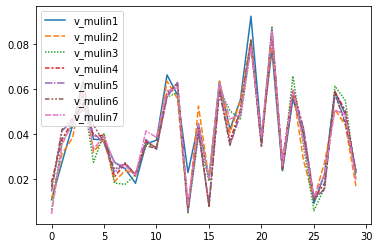

In [239]:
sns.lineplot(data=df_res_mulin)


<AxesSubplot:>

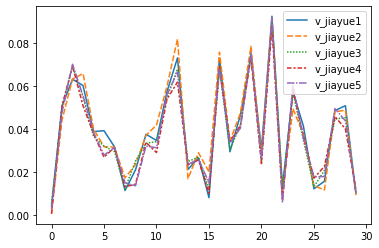

In [240]:
sns.lineplot(data=df_res_jiayue)

In [241]:
print("=" * 30 + " Sorted " + "=" * 30)
print(np.sort(topN_w_mulin1), np.sort(bottomM_w_mulin1))
print(np.sort(topN_w_mulin2), np.sort(bottomM_w_mulin2))
print(np.sort(topN_w_mulin3), np.sort(bottomM_w_mulin3))
print(np.sort(topN_w_other1), np.sort(bottomM_w_other1))
print('-' * 60)
print(np.sort(topN_v_mulin1), np.sort(bottomM_v_mulin1))
print(np.sort(topN_v_mulin2), np.sort(bottomM_v_mulin2))
print(np.sort(topN_v_mulin3), np.sort(bottomM_v_mulin3))
print(np.sort(topN_v_mulin4), np.sort(bottomM_v_mulin4))
print(np.sort(topN_v_mulin5), np.sort(bottomM_v_mulin5))
print(np.sort(topN_v_mulin6), np.sort(bottomM_v_mulin6))
print(np.sort(topN_v_mulin7), np.sort(bottomM_v_mulin7))
print("* ", topN_v_mulin4, bottomM_v_mulin4)
print("* ", topN_v_mulin5, bottomM_v_mulin5)
print("* ", topN_v_mulin6, bottomM_v_mulin6)
print('-' * 60)
print(np.sort(topN_v_jiayue1), np.sort(bottomM_v_jiayue1))
print(np.sort(topN_v_jiayue2), np.sort(bottomM_v_jiayue2))
print(np.sort(topN_v_jiayue3), np.sort(bottomM_v_jiayue3))
print(np.sort(topN_v_jiayue4), np.sort(bottomM_v_jiayue4))
print(np.sort(topN_v_jiayue5), np.sort(bottomM_v_jiayue5))
print("* ", topN_v_jiayue3, bottomM_v_jiayue3)
print("* ", topN_v_jiayue4, bottomM_v_jiayue4)
print("* ", topN_v_jiayue5, bottomM_v_jiayue5)


============================== Sorted ==============================
[16. 19. 21.] [13.]
[16. 19. 21.] [13.]
[12. 19. 21.] [26.]
[12. 16. 21.] [26.]
------------------------------------------------------------
[11. 19. 21.] [25.]
[11. 19. 21.] [13.]
[19. 21. 23.] [13.]
[12. 19. 21.] [13.]
[12. 19. 21.] [13.]
[12. 19. 21.] [13.]
[16. 19. 21.] [0.]
*  [21.0, 19.0, 12.0] [13.0]
*  [21.0, 19.0, 12.0] [13.0]
*  [21.0, 19.0, 12.0] [13.0]
------------------------------------------------------------
[12. 19. 21.] [0.]
[12. 19. 21.] [0.]
[ 2. 19. 21.] [0.]
[ 2. 19. 21.] [0.]
[ 2. 19. 21.] [0.]
*  [21.0, 19.0, 2.0] [0.0]
*  [21.0, 19.0, 2.0] [0.0]
*  [21.0, 19.0, 2.0] [0.0]
